# Librerías y dataset

In [15]:
# Autoload

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Cargamos librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

In [ ]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [18]:
df.shape

(2443651, 9)

In [19]:
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

# Part 1: Understanding Product Categories

## **Business Question**: 
What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [31]:
frequency_table_cat_proportions = df["category"].value_counts(normalize=True)
frequency_table_cat_proportions.head(5)

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Name: proportion, dtype: float64

In [32]:
frequency_table_cat_count = df["category"].value_counts()
frequency_table_cat_count.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

/var/folders/1x/604g3jcd6s54pz1_9_q0yygr0000gn/T/ipykernel_32435/3375556209.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_counts.index, y=top10_counts.values, palette="viridis")


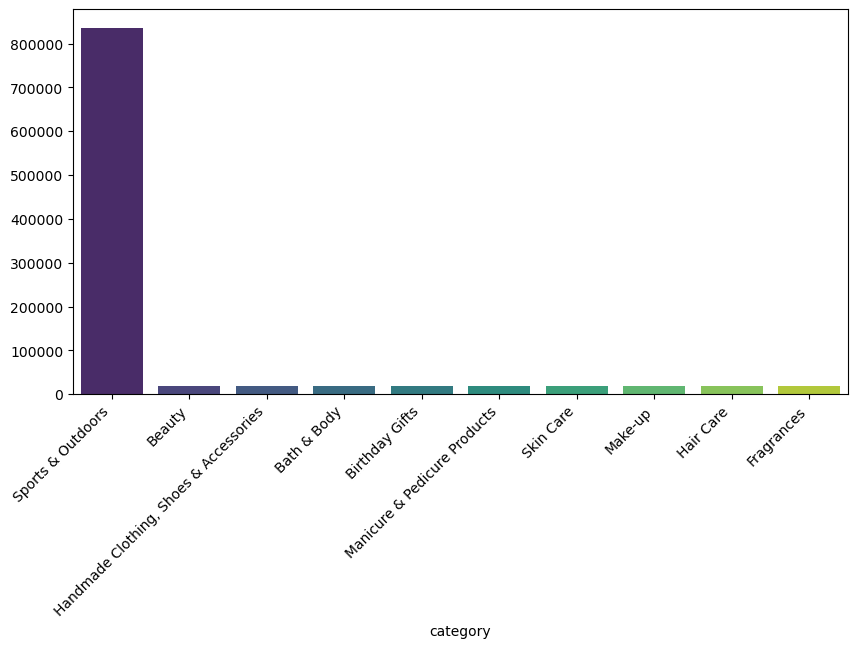

In [40]:
top10_counts = df["category"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top10_counts.index, y=top10_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.show()

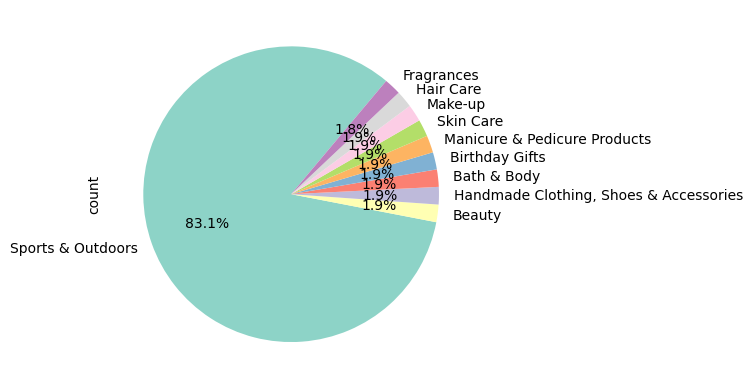

In [33]:
frequency_table_cat_count.head(10).plot.pie(autopct='%1.1f%%', startangle=50, colors=sns.color_palette("Set3"))
plt.show()

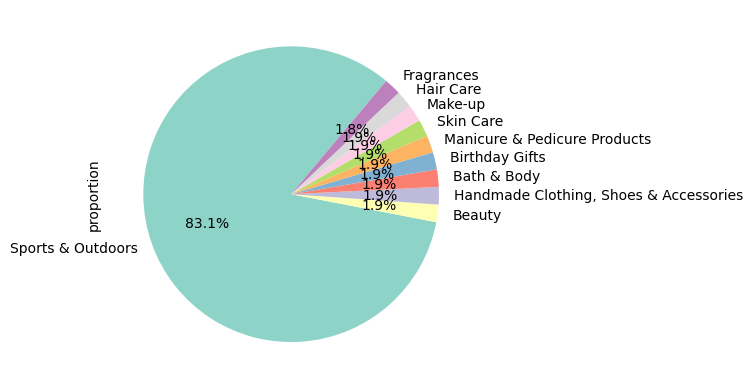

In [34]:
frequency_table_cat_proportions.head(10).plot.pie(autopct='%1.1f%%', startangle=50, colors=sns.color_palette("Set3"))
plt.show()

Sports & Outdoors domina de entre todas las categorías.

## Part 2: Delving into Product Pricing

### **Business Question**: 

How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [26]:
# 1. **Measures of Centrality**:

mean = df["price"].mean()
median = df["price"].median()
mode = df["price"].mode()

print(f"Media: {mean}, Median: {median}, Mode: {mode}")

Media: 89.24380943923663, Median: 19.09, Mode: 0    9.99
Name: price, dtype: float64


- El precio medio es 89.24; el mediano 19; la moda 9.99.
- Lo que significa que hay presencia de outliers que mueven el precio hacia arriba.

In [27]:
# **Measures of Dispersion**:

var = df["price"].var()
std = df["price"].std()
print(f"Variance: {var}, std: {std}")

Variance: 119445.4853225653, std: 345.6088617535223


- Hay indicadores de dispersión: la desviación estándar se sitúa en 345.69; relacionándolo con la media y la moda señalan la presencia de outliers (extremos).

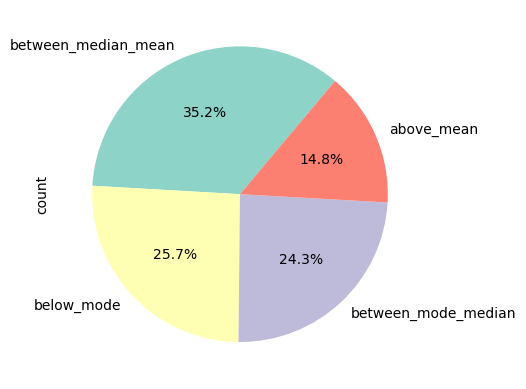

In [41]:
# 3. **Visualizations**:

bins = [0, 9.99, 19.09, 89.24, df["price"].max()]
labels = ['below_mode', 'between_mode_median', 'between_median_mean', 'above_mean']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

freq_price_catotegory = df.price_category.value_counts()

freq_price_catotegory.plot.pie(autopct='%1.1f%%', startangle=50, colors=sns.color_palette("Set3"))
plt.show()


**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [47]:
mean = df["stars"].mean()
median = df["stars"].median()
mode = df["stars"].mode()[0]

print(f"Mean: {mean}; Median: {median}; Mode: {mode}")

Mean: 2.152836472966065; Median: 0.0; Mode: 0.0


Con una media de 2.15 y siendo la mediana y la moda 0, hay una tendencia a la baja.

In [49]:
var = df["stars"].var()
std = df["stars"].std()
q75 = df["stars"].quantile(0.75)
q25 = df["stars"].quantile(0.25)

print(var)
print(std)
print(q75)
print(q25)

4.81743402976196
2.1948653785054697
4.4
0.0


Hay una varianza y una desviación estándar amplia.

In [51]:
skew_stars = df["stars"].skew()
kurtosis_stars = df["stars"].kurtosis()
skew_stars, kurtosis_stars

(np.float64(0.08120735761080985), np.float64(-1.9260061280432985))

Skew: muy cerca del 0, distribución simétrica.
Kurtosis: muy plana.

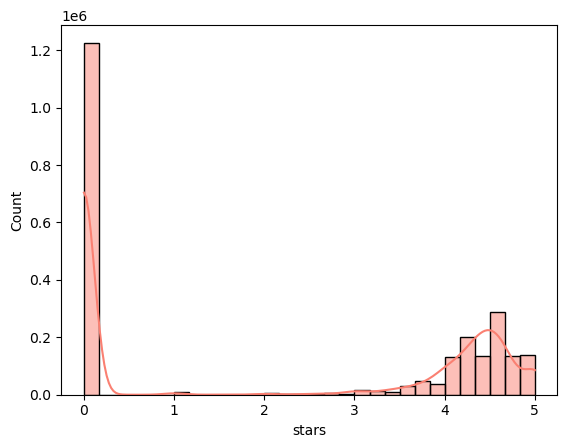

In [52]:
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")
plt.show()

Lo más común es el 0, luego entre 4 y 5.